pandasのplot

In [22]:
#coding=utf-8
import pandas as pd
from datetime import datetime

#okdate
okdf = pd.read_csv('/Users/enecom/send_sms/wd_anl/csv/OK/2020-02-14.csv',header=0)

#print(okdf.head())

print(okdf.shape)
print(okdf.columns)
#print(okdf.describe())

   name                      time  ap01  ap02  ap03  ap04  \
0  mes1  2020-02-14T00:00:00.948Z   0.1   0.2   0.2     0   
1  mes1  2020-02-14T00:00:01.935Z   0.1   0.1   0.2     0   
2  mes1  2020-02-14T00:00:02.933Z   0.1   0.2   0.2     0   
3  mes1  2020-02-14T00:00:03.943Z   0.1   0.2   0.2     0   
4  mes1  2020-02-14T00:00:04.934Z   0.1   0.1   0.2     0   

     meta.source_topic  out_1122  rw00  rw01  ...  th4_pm10  th4_pm25  \
0  /analytics/WoodCsv1         0     0  DCQ   ...         0         0   
1  /analytics/WoodCsv1         0     0  DCQ   ...         0         0   
2  /analytics/WoodCsv1         0     0  DCQ   ...         0         0   
3  /analytics/WoodCsv1         0     0  DCQ   ...         0         0   
4  /analytics/WoodCsv1         0     0  DCQ   ...         0         0   

   th4_pres th4_temp tp01  tp02  tp03  tp04  tp05            ts  
0         0        0  243   269   227   273   134  1.581638e+12  
1         0        0  243   269   227   273   134  1.581638e+1

In [118]:
#okdf_f1 = okdf.loc[:,['time','rw17','rw23','rw24','tp01','tp02','tp03','tp04','tp05']]
okdf_f1 = okdf.loc[:,['time','tp01','tp02','tp03','tp04','tp05']]
okdf_f1 = okdf_f1.rename(columns = {'tp05':'kiza','tp01':'maee','tp02':'hyou','tp03':'tohu','tp04':'endc'})
#okdf_f1.head()
print(okdf_f1.describe())
#okdf_f1.corr()
#tohu &hyou


               maee          hyou          tohu         endc          kiza
count  86296.000000  86296.000000  86296.000000  86296.00000  86296.000000
mean     252.205398    306.837038    253.725480    269.89244    135.722560
std       30.576874     95.030186     69.070668     14.92208      5.911246
min      150.000000    173.000000    151.000000    192.00000    113.000000
25%      243.000000    269.000000    227.000000    273.00000    131.000000
50%      247.000000    269.000000    234.000000    273.00000    134.000000
75%      249.000000    280.000000    234.000000    273.00000    142.000000
max      520.000000    614.000000    544.000000    464.00000    163.000000


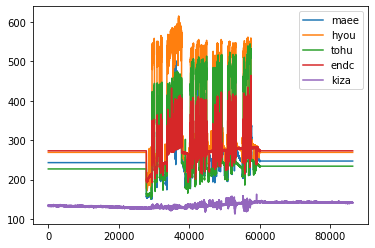

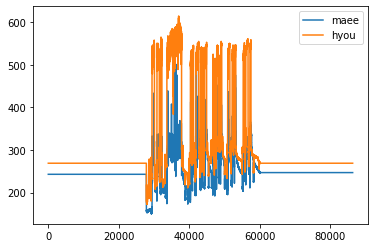

In [83]:
okdf_f1.plot()
#okdf_f1.loc[:,['maee','kiza']].plot()
okdf_f1.loc[:,['maee','hyou']].plot()


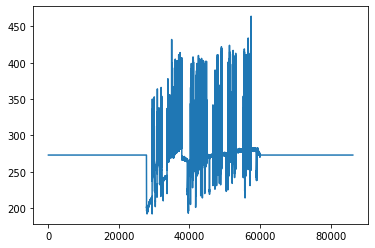

In [121]:
okdf_f1.endc.plot()

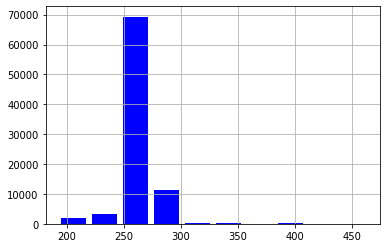

In [134]:
okdf_f1.endc.hist(bins=10, color='blue', rwidth=.8)

          maee      hyou      tohu      endc      kiza
maee  1.000000  0.743413  0.714168  0.403284  0.034591
hyou  0.743413  1.000000  0.947333  0.106349 -0.190647
tohu  0.714168  0.947333  1.000000  0.090168 -0.114217
endc  0.403284  0.106349  0.090168  1.000000  0.233284
kiza  0.034591 -0.190647 -0.114217  0.233284  1.000000


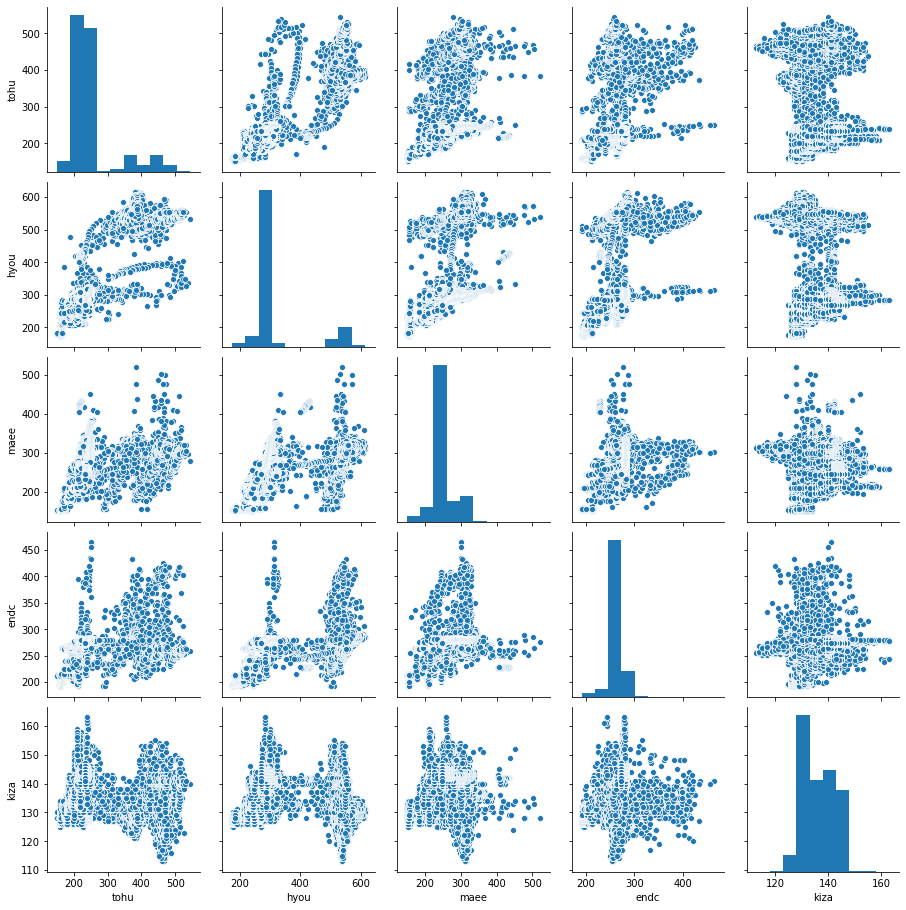

In [95]:
import seaborn as sns
#sns.pairplot(okdf_f1.loc[:,['maee','hyou']])
print(okdf_f1.corr())

print(sns.pairplot(okdf_f1.loc[:,['tohu','hyou','maee','endc','kiza']]))

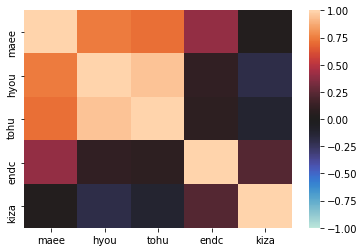

In [97]:
sns.heatmap(okdf_f1.corr(), vmax=1, vmin=-1, center=0)

(array([1.1900e+03, 1.6680e+03, 3.0050e+03, 1.0099e+04, 6.9520e+04,
        4.0100e+02, 9.5000e+01, 7.9000e+01, 5.1000e+01, 5.1000e+01,
        1.0200e+02, 3.0000e+01, 3.0000e+00]),
 array([190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430,
        450]),
 <a list of 13 Patch objects>)

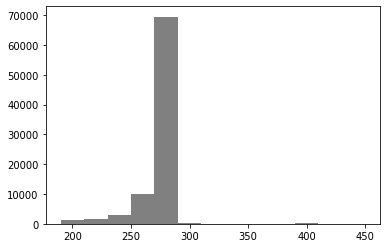

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(okdf_f1.endc, list(range(190, 470, 20)), color='gray', rwidth=3)

plt.xticks(okdf_f1.endc,list(range(0,500,20)))

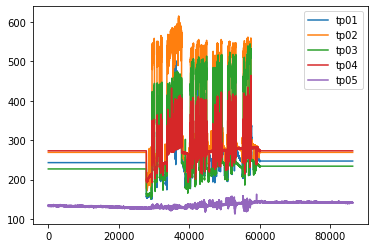

In [ ]:
#print(okdf.loc[:,['time','rw05','rw06','rw07','rw15','rw16','rw17','rw23','rw24','rw35','tp01','tp02','tp03','tp04','tp05']].head())

okdf_f1 = okdf.loc[:,['time','rw05','rw06','rw07','rw15','rw16','rw17','rw23','rw24','rw35','tp01','tp02','tp03','tp04','tp05']]

print(okdf_f1.dtypes)
#print(okdf_f1[okdf_f1['time'] > 2020-02-05].head())

#print(okdf_f1.head())  timeをindexにしたらobjectからdatetime変換が使えない？
#okdf_f1 = okdf_f1.set_index('time')

#string(object)type to datetimetype translate
okdf_f1['time'] = pd.to_datetime(okdf_f1['time'])
#print(okdf_f1.dtypes)

#print('index',okdf_f1_i.info())
#print(okdf_f1.head())

#timeseries from to condition add
#print(okdf_f1[((okdf_f1['time'] > datetime(2020,2,5,7)) & (okdf_f1['time'] < datetime(2020,2,5,9)))].count())

# okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,5,7)) & (okdf_f1['time'] < datetime(2020,2,5,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,6,7)) & (okdf_f1['time'] < datetime(2020,2,6,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,12,7)) & (okdf_f1['time'] < datetime(2020,2,12,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,13,7)) & (okdf_f1['time'] < datetime(2020,2,13,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,17,7)) & (okdf_f1['time'] < datetime(2020,2,17,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,18,7)) & (okdf_f1['time'] < datetime(2020,2,18,9)))]
#
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,4,7)) & (okdf_f1['time'] < datetime(2020,2,4,9)))]
#okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,10,7)) & (okdf_f1['time'] < datetime(2020,2,10,9)))]
okdf_f2 = okdf_f1[((okdf_f1['time'] > datetime(2020,2,25,7)) & (okdf_f1['time'] < datetime(2020,2,25,9)))]

print(okdf_f2)

# okdf_f2.to_csv("ok_df_20200205.csv",header=False, index=False)
#okdf_f2.to_csv("ok_df_20200206.csv",header=False, index=False)
#okdf_f2.to_csv("ok_df_20200212.csv",header=False, index=False)
#okdf_f2.to_csv("ok_df_20200213.csv",header=False, index=False)
#okdf_f2.to_csv("ok_df_20200217.csv",header=False, index=False)
#okdf_f2.to_csv("ok_df_20200218.csv",header=False, index=False)
#
#okdf_f2.to_csv("ng_df_20200204.csv",header=False, index=False)
#okdf_f2.to_csv("ng_df_20200210.csv",header=False, index=False)
#okdf_f2.to_csv("ng_df_20200225.csv",header=False, index=False)